In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'


# Set number of classes

In [3]:
NUM_CLASSES = 26

# Dataset reading

In [10]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [11]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='mish', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [14]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization_1                │ (None, 42)                  │             168 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │           5,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 26)                  │             858 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,866 (65.88 KB)

 Trainable params: 16,782 (65.55 KB)

 Non-trainable params: 84 (336.00 B)

In [15]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [16]:
# Model compilation
model.compile(
    optimizer='Adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [17]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1255 - loss: 4.4842
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1722 - loss: 3.8786 - val_accuracy: 0.2355 - val_loss: 3.0859
Epoch 2/1000
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2591 - loss: 2.9300
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2761 - loss: 2.8111 - val_accuracy: 0.3789 - val_loss: 2.4389
Epoch 3/1000
204/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3319 - loss: 2.5515
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3429 - loss: 2.4923 - val_accuracy: 0.4417 - val_loss: 2.1806
Epoch 4/1000
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3809 - loss: 2.3482
Epoch 4: saving model to model/keypoint_classifier/keypoint_classi

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5834 - loss: 1.6983
Epoch 24: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5883 - loss: 1.6833 - val_accuracy: 0.7101 - val_loss: 1.3775
Epoch 25/1000
201/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5925 - loss: 1.6686
Epoch 25: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5916 - loss: 1.6746 - val_accuracy: 0.7084 - val_loss: 1.3722
Epoch 26/1000
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5926 - loss: 1.6719
Epoch 26: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5947 - loss: 1.6617 - val_accuracy: 0.7160 - val_loss: 1.3526
Epoch 27/1000
204/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6040 - loss: 1.6300
Epoch 27: saving model to model/keypoint_classifier/keypoint_classifier.k

212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6548 - loss: 1.4566
Epoch 47: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6544 - loss: 1.4574 - val_accuracy: 0.7698 - val_loss: 1.1632
Epoch 48/1000
206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6522 - loss: 1.4455
Epoch 48: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6536 - loss: 1.4494 - val_accuracy: 0.7671 - val_loss: 1.1548
Epoch 49/1000
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6595 - loss: 1.4533
Epoch 49: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6609 - loss: 1.4484 - val_accuracy: 0.7744 - val_loss: 1.1453
Epoch 50/1000
198/214 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6679 - loss: 1.4206
Epoch 50: saving model to model/keypoint_classifier/keypoint_classifier.k

211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6855 - loss: 1.3564
Epoch 70: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6873 - loss: 1.3509 - val_accuracy: 0.7971 - val_loss: 1.0605
Epoch 71/1000
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6856 - loss: 1.3389
Epoch 71: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6866 - loss: 1.3391 - val_accuracy: 0.7944 - val_loss: 1.0539
Epoch 72/1000
192/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6802 - loss: 1.3505
Epoch 72: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6849 - loss: 1.3493 - val_accuracy: 0.7982 - val_loss: 1.0525
Epoch 73/1000
206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6851 - loss: 1.3446
Epoch 73: saving model to model/keypoint_classifier/keypoint_classifier.k

198/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7028 - loss: 1.2902
Epoch 93: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7035 - loss: 1.2911 - val_accuracy: 0.8214 - val_loss: 0.9993
Epoch 94/1000
204/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7119 - loss: 1.2702
Epoch 94: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7094 - loss: 1.2844 - val_accuracy: 0.8233 - val_loss: 0.9898
Epoch 95/1000
197/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7059 - loss: 1.2796
Epoch 95: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7052 - loss: 1.2794 - val_accuracy: 0.8224 - val_loss: 0.9824
Epoch 96/1000
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7045 - loss: 1.2801
Epoch 96: saving model to model/keypoint_classifier/keypoint_classifier.k

206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7245 - loss: 1.2248
Epoch 116: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7202 - loss: 1.2352 - val_accuracy: 0.8267 - val_loss: 0.9539
Epoch 117/1000
204/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7172 - loss: 1.2312
Epoch 117: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7183 - loss: 1.2340 - val_accuracy: 0.8209 - val_loss: 0.9443
Epoch 118/1000
193/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7271 - loss: 1.2152
Epoch 118: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7211 - loss: 1.2308 - val_accuracy: 0.8307 - val_loss: 0.9468
Epoch 119/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7290 - loss: 1.2140
Epoch 119: saving model to model/keypoint_classifier/keypoint_class

206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7268 - loss: 1.2037
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7283 - loss: 1.2005 - val_accuracy: 0.8438 - val_loss: 0.9122
Epoch 140/1000
192/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7319 - loss: 1.2031
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7309 - loss: 1.1973 - val_accuracy: 0.8460 - val_loss: 0.9120
Epoch 141/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7295 - loss: 1.1894
Epoch 141: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7314 - loss: 1.1902 - val_accuracy: 0.8449 - val_loss: 0.9031
Epoch 142/1000
192/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7301 - loss: 1.2074
Epoch 142: saving model to model/keypoint_classifier/keypoint_class

193/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7327 - loss: 1.1882
Epoch 162: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7387 - loss: 1.1671 - val_accuracy: 0.8513 - val_loss: 0.8724
Epoch 163/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7424 - loss: 1.1549
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7400 - loss: 1.1657 - val_accuracy: 0.8530 - val_loss: 0.8793
Epoch 164/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7337 - loss: 1.1691
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7348 - loss: 1.1713 - val_accuracy: 0.8481 - val_loss: 0.8732
Epoch 165/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7385 - loss: 1.1517
Epoch 165: saving model to model/keypoint_classifier/keypoint_class

210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7436 - loss: 1.1373
Epoch 185: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7414 - loss: 1.1429 - val_accuracy: 0.8503 - val_loss: 0.8505
Epoch 186/1000
191/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7477 - loss: 1.1291
Epoch 186: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7462 - loss: 1.1366 - val_accuracy: 0.8520 - val_loss: 0.8513
Epoch 187/1000
206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7390 - loss: 1.1531
Epoch 187: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7400 - loss: 1.1472 - val_accuracy: 0.8536 - val_loss: 0.8596
Epoch 188/1000
204/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7482 - loss: 1.1321
Epoch 188: saving model to model/keypoint_classifier/keypoint_class

200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7406 - loss: 1.1436
Epoch 208: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7470 - loss: 1.1227 - val_accuracy: 0.8539 - val_loss: 0.8426
Epoch 209/1000
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7474 - loss: 1.1149
Epoch 209: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7441 - loss: 1.1316 - val_accuracy: 0.8607 - val_loss: 0.8293
Epoch 210/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7455 - loss: 1.1193
Epoch 210: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7457 - loss: 1.1263 - val_accuracy: 0.8478 - val_loss: 0.8490
Epoch 211/1000
201/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7477 - loss: 1.1292
Epoch 211: saving model to model/keypoint_classifier/keypoint_class

211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7472 - loss: 1.1237
Epoch 231: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7542 - loss: 1.1063 - val_accuracy: 0.8530 - val_loss: 0.8256
Epoch 232/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7471 - loss: 1.1144
Epoch 232: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7492 - loss: 1.1101 - val_accuracy: 0.8540 - val_loss: 0.8196
Epoch 233/1000
209/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7502 - loss: 1.1148
Epoch 233: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7542 - loss: 1.1059 - val_accuracy: 0.8533 - val_loss: 0.8140
Epoch 234/1000
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7563 - loss: 1.0923
Epoch 234: saving model to model/keypoint_classifier/keypoint_class

206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7579 - loss: 1.0961
Epoch 254: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7551 - loss: 1.0996 - val_accuracy: 0.8498 - val_loss: 0.8006
Epoch 255/1000
195/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7529 - loss: 1.0904
Epoch 255: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7548 - loss: 1.0858 - val_accuracy: 0.8597 - val_loss: 0.8001
Epoch 256/1000
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7558 - loss: 1.0857
Epoch 256: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7564 - loss: 1.0826 - val_accuracy: 0.8538 - val_loss: 0.8012
Epoch 257/1000
199/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7493 - loss: 1.0975
Epoch 257: saving model to model/keypoint_classifier/keypoint_class

205/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7561 - loss: 1.0767
Epoch 277: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7549 - loss: 1.0793 - val_accuracy: 0.8570 - val_loss: 0.7976
Epoch 278/1000
206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7518 - loss: 1.0907
Epoch 278: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7558 - loss: 1.0851 - val_accuracy: 0.8613 - val_loss: 0.7865
Epoch 279/1000
201/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 1.0636
Epoch 279: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7600 - loss: 1.0779 - val_accuracy: 0.8513 - val_loss: 0.8044
Epoch 280/1000
207/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7540 - loss: 1.0810
Epoch 280: saving model to model/keypoint_classifier/keypoint_class

211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7571 - loss: 1.0735
Epoch 300: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7542 - loss: 1.0898 - val_accuracy: 0.8616 - val_loss: 0.7840
Epoch 301/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7641 - loss: 1.0591
Epoch 301: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7606 - loss: 1.0630 - val_accuracy: 0.8633 - val_loss: 0.7862
Epoch 302/1000
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7588 - loss: 1.0675
Epoch 302: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7599 - loss: 1.0675 - val_accuracy: 0.8607 - val_loss: 0.7753
Epoch 303/1000
208/214 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7628 - loss: 1.0525
Epoch 303: saving model to model/keypoint_classifier/keypoint_class

206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7571 - loss: 1.0574
Epoch 323: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7577 - loss: 1.0674 - val_accuracy: 0.8577 - val_loss: 0.7712
Epoch 324/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7620 - loss: 1.0632
Epoch 324: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7606 - loss: 1.0607 - val_accuracy: 0.8551 - val_loss: 0.7750
Epoch 325/1000
205/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7627 - loss: 1.0492
Epoch 325: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7597 - loss: 1.0649 - val_accuracy: 0.8649 - val_loss: 0.7845
Epoch 326/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7620 - loss: 1.0721
Epoch 326: saving model to model/keypoint_classifier/keypoint_class

212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 1.0615
Epoch 346: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7590 - loss: 1.0576 - val_accuracy: 0.8607 - val_loss: 0.7595
Epoch 347/1000
198/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7604 - loss: 1.0511
Epoch 347: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7604 - loss: 1.0579 - val_accuracy: 0.8658 - val_loss: 0.7553
Epoch 348/1000
207/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7617 - loss: 1.0533
Epoch 348: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7593 - loss: 1.0534 - val_accuracy: 0.8517 - val_loss: 0.7603
Epoch 349/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7576 - loss: 1.0669
Epoch 349: saving model to model/keypoint_classifier/keypoint_class

204/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 1.0589
Epoch 369: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7599 - loss: 1.0461 - val_accuracy: 0.8631 - val_loss: 0.7548
Epoch 370/1000
196/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7624 - loss: 1.0608
Epoch 370: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 1.0397 - val_accuracy: 0.8631 - val_loss: 0.7461
Epoch 371/1000
189/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7627 - loss: 1.0432
Epoch 371: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7628 - loss: 1.0505 - val_accuracy: 0.8584 - val_loss: 0.7550
Epoch 372/1000
195/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7621 - loss: 1.0415
Epoch 372: saving model to model/keypoint_classifier/keypoint_class

195/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7660 - loss: 1.0332
Epoch 392: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7644 - loss: 1.0341 - val_accuracy: 0.8708 - val_loss: 0.7485
Epoch 393/1000
200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7618 - loss: 1.0468
Epoch 393: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7655 - loss: 1.0386 - val_accuracy: 0.8684 - val_loss: 0.7481
Epoch 394/1000
206/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7647 - loss: 1.0281
Epoch 394: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7645 - loss: 1.0303 - val_accuracy: 0.8610 - val_loss: 0.7528
Epoch 395/1000
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7679 - loss: 1.0240
Epoch 395: saving model to model/keypoint_classifier/keypoint_class

207/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 1.0423
Epoch 415: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7603 - loss: 1.0380 - val_accuracy: 0.8641 - val_loss: 0.7432
Epoch 416/1000
209/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7654 - loss: 1.0368
Epoch 416: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7652 - loss: 1.0304 - val_accuracy: 0.8740 - val_loss: 0.7404
Epoch 417/1000
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7668 - loss: 1.0354
Epoch 417: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7634 - loss: 1.0413 - val_accuracy: 0.8735 - val_loss: 0.7404
Epoch 418/1000
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7629 - loss: 1.0373
Epoch 418: saving model to model/keypoint_classifier/keypoint_class

200/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7669 - loss: 1.0297
Epoch 438: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7674 - loss: 1.0276 - val_accuracy: 0.8709 - val_loss: 0.7404
Epoch 439/1000
194/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7630 - loss: 1.0375
Epoch 439: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7654 - loss: 1.0292 - val_accuracy: 0.8717 - val_loss: 0.7243
Epoch 440/1000
202/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7646 - loss: 1.0206
Epoch 440: saving model to model/keypoint_classifier/keypoint_classifier.keras
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7650 - loss: 1.0239 - val_accuracy: 0.8534 - val_loss: 0.7508
Epoch 441/1000
205/214 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7664 - loss: 1.0211
Epoch 441: saving model to model/keypoint_classifier/keypoint_class

In [18]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8721 - loss: 0.7272


In [4]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [20]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[9.3124085e-04 5.8304128e-10 1.0441249e-08 1.6310687e-06 5.1409580e-07
 2.3097411e-07 5.0258450e-07 2.5060594e-11 6.9350610e-04 4.1950936e-04
 2.3986206e-06 1.0449397e-04 1.6551790e-05 3.7863931e-08 6.5993804e-06
 4.3222643e-09 4.9983095e-10 7.5739484e-11 5.6784142e-08 7.2069939e-05
 1.7890209e-10 1.2247448e-08 1.1700382e-06 7.7042921e-07 9.9774879e-01
 1.5025021e-08]
24


# Confusion matrix

285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


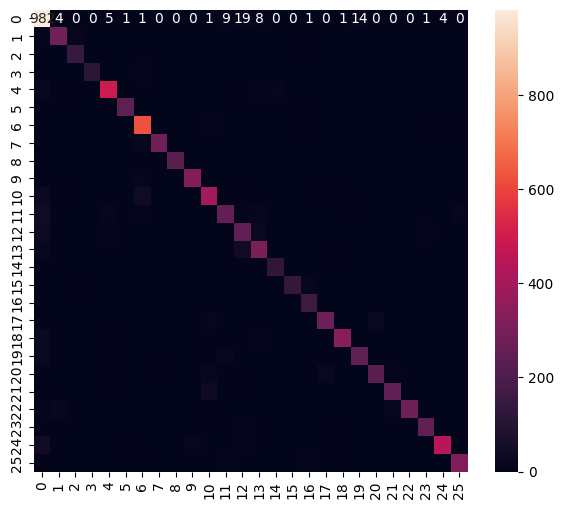

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85      1051
           1       0.87      0.90      0.89       318
           2       0.83      0.96      0.89       150
           3       0.92      0.86      0.89       128
           4       0.89      0.89      0.89       553
           5       0.93      0.95      0.94       251
           6       0.88      0.95      0.91       657
           7       0.97      0.92      0.94       302
           8       0.97      0.95      0.96       235
           9       0.96      0.93      0.95       353
          10       0.82      0.81      0.81       489
          11       0.85      0.70      0.77       360
          12       0.70      0.77      0.73       324
          13       0.80      0.82      0.81       373
          14       0.83      0.96      0.89       129
          15       0.96      0.83      0.89       158
          16       0.77      0.99      0.87       163
     

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [22]:
# Save as a model dedicated to inference
model.save(model_save_path)

In [ ]:
# Transform model (quantization)

# 1. Create a "representative dataset" generator
# This feeds a few hundred samples to the converter 
# so it can learn the data's range and quantize efficiently.
def representative_data_gen():
    for i in range(500): # Use 500 samples
        # Use a random sample from your training data
        index = np.random.randint(0, len(X_train) - 1)
        yield [np.array([X_train[index]], dtype=np.float32)]

# 2. Set up the converter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# This ensures it quantizes to 8-bit integers, which is what we want
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # or tf.uint8
converter.inference_output_type = tf.int8 # or tf.uint8

print("Starting TFLite conversion with quantization...")

# 3. Convert the model
tflite_quantized_model = converter.convert()

# 4. Save the model
open(tflite_save_path, 'wb').write(tflite_quantized_model)

print(f"Successfully converted and saved model to {tflite_save_path}")

Starting TFLite conversion with quantization...
INFO:tensorflow:Assets written to: C:\Users\Kunal\AppData\Local\Temp\tmpp9e292k3\assets


INFO:tensorflow:Assets written to: C:\Users\Kunal\AppData\Local\Temp\tmpp9e292k3\assets


# Inference test

In [1]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

NameError: name 'tf' is not defined

In [41]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 4.64 ms


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.8779062e-03 4.3515342e-08 4.5718554e-08 3.0386323e-07 8.5708109e-07
 4.0149325e-07 3.5321791e-06 7.4898473e-12 9.0636604e-04 1.6149273e-04
 7.0539604e-06 9.0892005e-05 1.0583010e-05 9.3040903e-08 9.3756071e-06
 1.1751931e-09 4.5462611e-09 1.3466411e-09 6.6406932e-07 2.1929979e-04
 7.7895984e-10 7.5600248e-10 3.3496627e-07 5.4423335e-06 9.9570531e-01
 2.3175753e-08]
24
